Za pomocą funkcji: 

```python
sklearn.datasets.make_moons
```

wygenerujmy 4 zbiory danych z parametrami:

  * n_samples=1000, noise=.05
  * n_samples=1000, noise=.3
  * n_samples=200, noise=.05
  * n_samples=200, noise=.3


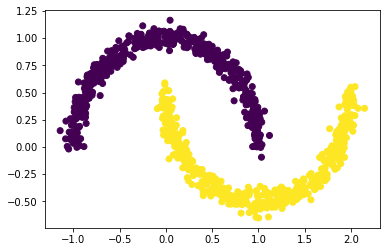

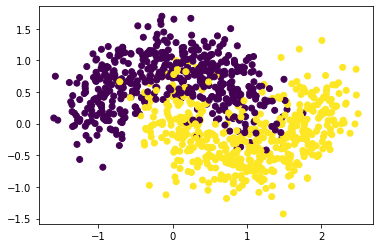

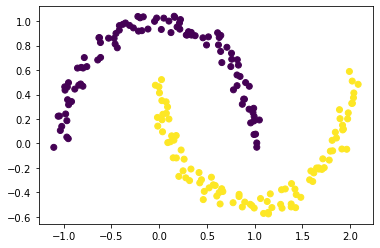

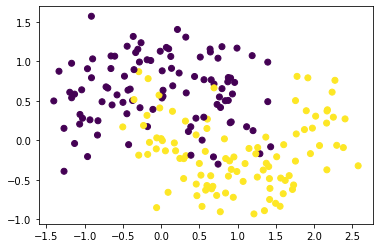

In [10]:
from sklearn.datasets import make_moons

A=make_moons(n_samples=1000, noise =.05)
B=make_moons(n_samples=1000, noise =.3)
C=make_moons(n_samples=200, noise =.05)
D=make_moons(n_samples=200, noise =.3)

import matplotlib.pyplot as plt

plt.scatter(A[0][:,0],A[0][:,1],c=A[1])
plt.show()
plt.scatter(B[0][:,0],B[0][:,1],c=B[1])
plt.show()
plt.scatter(C[0][:,0],C[0][:,1],c=C[1])
plt.show()
plt.scatter(D[0][:,0],D[0][:,1],c=D[1])
plt.show()

# Zadanie 1

Do równania prostej w postaci ogólnej:

$$
Ax + By + C = 0
$$

łatwo znaleźć współrzędne wektora prostopadłego do wykresu:

$$
v = [A,B].
$$

Łatwo policzyć, że dla funkcji:

$$
y = ax+b
$$

mamy

$$
A=-a, B=1, C=-b
$$

Dla danych z poprzedniego zadania narysuj dowolną prostą przechodzącą przez środek układu współrzędnych i dokonaj klasyfikacji.
Dane po lewej stronie mają być oznaczone jako -1, a prawej jako +1. Użyj iloczynu skalarnego oraz wektora normalnego do prostej.

Wykonaj rysunek na którym oprócz danych zaznaczona będzie linia podziału.

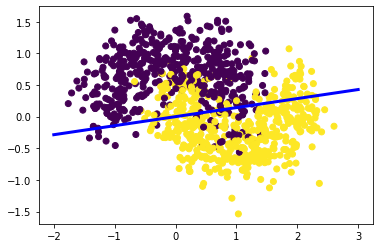

In [17]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
n = 1000
m = 1/7
features, target = make_moons(n_samples = n, noise = .3) #generujemy księżyce
x = [m*features[i,0]-features[i,1] for i in range(0,n)] #linia podziału
F = np.arange(-2,4)
fig, ax = plt.subplots()
ax.plot(F, m * F, "b-", linewidth=3) #rysuje linie podziału

plt.scatter(features[:,0], features[:,1], c=target) #rysuje punkty

plt.show()



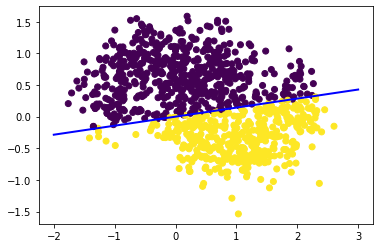

In [27]:
v = np.asarray(x).reshape(-1,1) #zmiana 
#print(v)
for i in range(0,n): #klasyfikacja
    if v[i]<0:
        target[i] = 0
    else:
        target[i] = 1
X = np.arange(-2, 4)
fig, ax = plt.subplots()
ax.plot(X, m*X, "b-",linewidth = 2)
plt.scatter(features[:,0], features[:,1],c=target)
plt.show()
    

# Zadanie 2
Predykcji można dokonać dla dowolnego punktu na płaszczyźnie. Wygeneruj punkty równomiernie na kwadracie zawierającym dane i wykonaj dla nich predykcję.

Oryginalny zbiór danych niech będzie pokolorowany za pomocą oryginalnych klas. Narysuj wszystko na jednym wykresie.

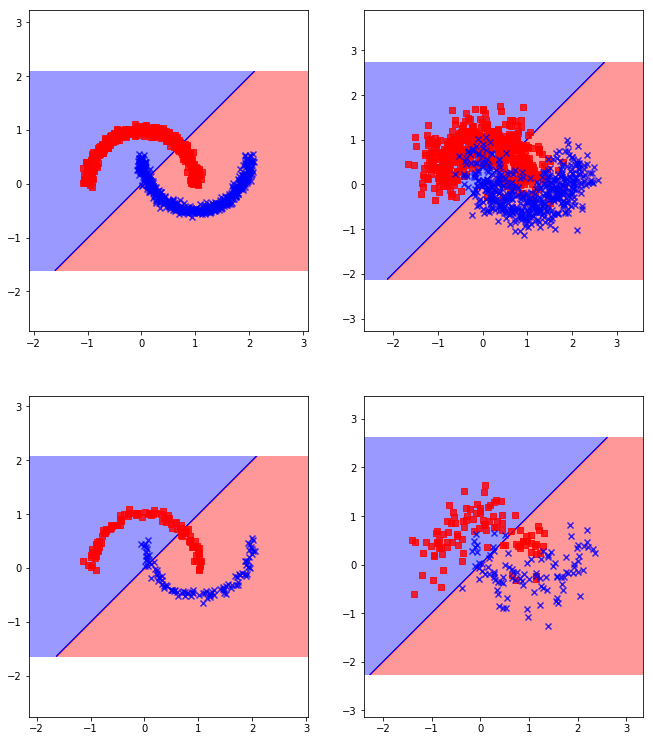

# Zadanie 3 
Dla danych iris (dwie wybrane współrzędne) wytrenuj logistyczną regresję i wykonaj rysunek jak poniżej (czyli z zaznaczonymi obszarami klasyfikacji).


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


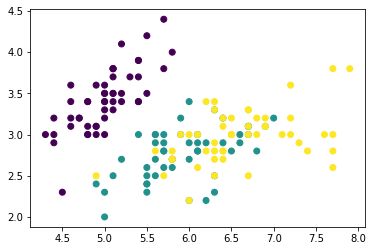

In [29]:
from sklearn import datasets


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

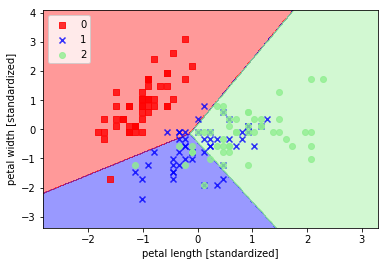

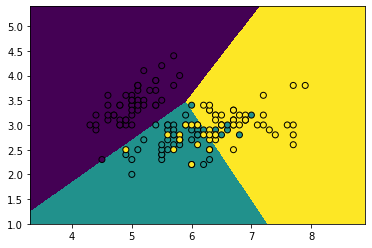

In [163]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X,y)
x1_max, x1_min = np.max(X[:,0]) + 1, np.min(X[:,0]) - 1
x2_max, x2_min = np.max(X[:,1]) + 1, np.min(X[:,1]) - 1
mesh_x1, mesh_x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000), np.linspace(x2_min, x2_max, 1000)) # macierz wspolrzednych
y_pred = model.predict(np.c_[mesh_x1.ravel(), mesh_x2.ravel()]).reshape(mesh_x1.shape)
plt.figure()
plt.pcolormesh(mesh_x1, mesh_x2, y_pred)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors = 'k')
plt.show()

# Zadanie 4

Użyj sztucznych danych z poniższego przykładu, aby wykonać model regresji liniowej (który posłuże do bardzo naiwnej klasyfikacji) oraz regresji logistycznej. 
Dla każdego z modelów narysuj odpowiednią prostą (graniczną) ilustrującą działanie owego modelu.

             A          B  C
0     4.098715  -2.300050  0
1     2.549373  -0.543828  0
2    -0.442250  -0.140510  0
3     0.405268   0.481365  0
4    -0.963854  -0.339003  0
..         ...        ... ..
995  22.123858  18.808692  0
996  33.335528   7.719241  0
997  20.867609  20.977389  0
998  21.760659  16.378643  0
999  31.560359  39.135875  0

[2000 rows x 3 columns]


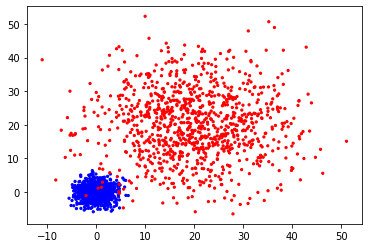

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



N=1000

df1 = 2*pd.DataFrame(np.random.randn(N, 2), columns=['A', 'B'])
df2 = 20+10*pd.DataFrame(np.random.randn(N, 2), columns=['A', 'B'])
#print(df1.mean())
#print(df2.mean())

Data=df1.append(df2)
Data['C']=1
Data.loc[range(0,N),'C']=0
print(Data)
import matplotlib.pyplot as plt

s='b'*N+'r'*N
plt.scatter(Data['A'],Data['B'], s=5,alpha=1,c=list(s))


[0.02090547 0.01942845]
0.10359835372352827
[[0.69270337 0.61749373]]
[-5.69575978]


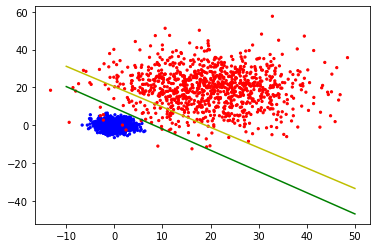

In [8]:
import numpy as np
import pandas as pd
N=1000

df1 = 2*pd.DataFrame(np.random.randn(N, 2), columns=['A', 'B'])
df2 = 20+10*pd.DataFrame(np.random.randn(N, 2), columns=['A', 'B'])
#print(df1.mean())
#print(df2.mean())

Data=df1.append(df2, ignore_index=True)
Data['C']=1
Data.loc[range(0,N),'C']=0

import matplotlib.pyplot as plt



from sklearn.linear_model import LogisticRegression, LinearRegression

X = Data.to_numpy()[:,:2]
Y = Data.to_numpy()[:,2]

model_lin = LinearRegression().fit(X,Y)
print(model_lin.coef_)
print(model_lin.intercept_)



x = np.linspace(-10,50,100)
y = (0.5-model_lin.intercept_ - model_lin.coef_[0]*x)/model_lin.coef_[1]
plt.plot(x,y,'y')  #prosta regresji liniowa

model_log = LogisticRegression().fit(X,Y)
print(model_log.coef_)
print(model_log.intercept_)

y = (-model_log.intercept_ - model_log.coef_[0][0]*x)/model_log.coef_[0][1]
plt.plot(x,y,'g')   #prosta regrasji logistycznej

plt.scatter(Data['A'],Data['B'], s=5,alpha=1,c=list(s))
plt.show()


# Zadanie 5
Przedstaw tabele "True/False Positive/Negative" dla modeli wykonanych w poprzednim zadaniu. Oblicz czułość, swoistość, dodatnią wartość predykcyjną oraz wartość $F_1$. Użyj 
```python
sklearn.metrics.confusion_matrix
```

In [9]:
from sklearn.metrics import confusion_matrix
y_true = Data['C']
y_pred_log = model_log.predict(X)
cm_log = confusion_matrix(y_true, y_pred_log)
print(cm_log)
# czulosc
recall = cm_log[1,1]/(cm_log[0,1]+cm_log[1,1])
print('Czulosc: ', recall)
# swoistosc
spc = cm_log[0,0]/(cm_log[1,0]+cm_log[1,1])
print('Swoistosc: ', spc)
# dodatnia wartosc predykcyjna
prec = cm_log[1,1]/(cm_log[1,0]+cm_log[1,1])
print('Dodatnia wartosc predykcyjna: ', prec)
# F1
f1 = 2*recall*prec/(recall+prec)
print('F1: ', f1)

[[1000    0]
 [  13  987]]
Czulosc:  1.0
Swoistosc:  1.0
Dodatnia wartosc predykcyjna:  0.987
F1:  0.9934574735782586


# Zadanie 6

Dopasuj dwa modele regresji logistycznej na danych dotyczących irisów, który objaśnia rodzaj. Pierwszy model ma opierać się na trzech pierwszych zmiennych objaśniających (jak na rysunku), drugi ma mieć cztery zmienne objaśniające. Następnie przedstaw tabelę "True/False Positive/Negative" dla wykonanych modeli. Oblicz czułość, swoistość, dodatnią wartość predykcyjną oraz wartość $F_1$. Porównaj modele. Dodatkowo narysuj płaszczyznę, będącą warunkiem brzegowym dla pierwszego modelu.

[[47  3]
 [ 3 47]]
Czulosc:  0.94
Swoistosc:  0.94
Dodatnia wartosc predykcyjna:  0.94
F1:  0.94
[[47  3]
 [ 1 49]]
Czulosc:  0.9423076923076923
Swoistosc:  0.94
Dodatnia wartosc predykcyjna:  0.98
F1:  0.9607843137254902


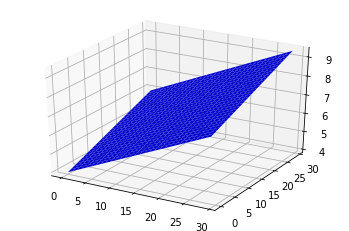

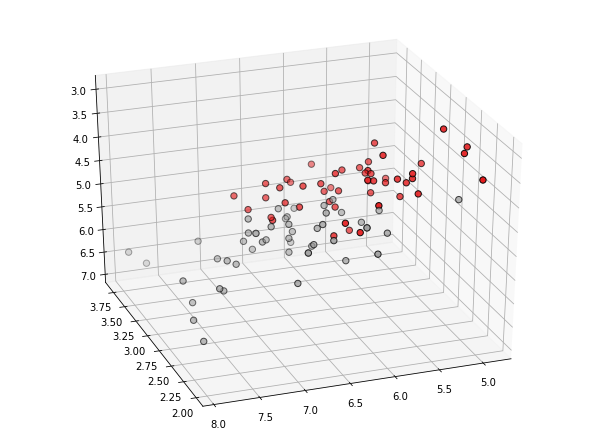

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


# import some data to play with
iris = datasets.load_iris()


X = iris.data[iris.target!=0]
y = iris.target[iris.target!=0]
X1 = X[:,0:3]

model1 = LogisticRegression().fit(X1,y)
y_pred1 = model1.predict(X1)
cm1 = confusion_matrix(y, y_pred1)
print(cm1)

recall1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Czulosc: ', recall1)

spc1 = cm1[0,0]/(cm1[1,0]+cm1[1,1])
print('Swoistosc: ', spc1)

prec1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Dodatnia wartosc predykcyjna: ', prec1)

f11 = 2*recall1*prec1/(recall1+prec1)
print('F1: ', f11)


model2 = LogisticRegression().fit(X,y)
y_pred2 = model2.predict(X)

#print(y_pred2)


cm2 = confusion_matrix(y, y_pred2)
print(cm2)

recall2 = cm2[1,1]/(cm2[0,1]+cm2[1,1])
print('Czulosc: ', recall2)

spc2 = cm2[0,0]/(cm2[1,0]+cm2[1,1])
print('Swoistosc: ', spc2)

prec2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Dodatnia wartosc predykcyjna: ', prec2)

f12 = 2*recall2*prec2/(recall2+prec2)
print('F1: ', f12)


normal = model1.coef_.T
#print(normal)
d = model1.intercept_

xx, yy = np.meshgrid(range(30), range(30))

z = (-normal[0]*xx - normal[1]*yy - d)*1./normal[2]
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx,yy,z, color='blue')
plt.show()

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)

plt.show()

# Zadanie 7

Bazując na poniższych danych dobierz model regresji logistycznej, gdzie zmienną objaśnianą jest kolumna D. Następnie przedstaw tabelę "True/False Positive/Negative" dla wykonanych modeli. Oblicz czułość, swoistość, dodatnią wartość predykcyjną oraz wartość $F_1$.
Następnie dodaj do zmiennych objaśniających kwadrat pierwszej kolumny. Ponownie oblicz czułość, swoistość, dodatnią wartość predykcyjną oraz wartość $F_1$.

Zilustruj obie regresje odpowiednią płaszczyzną oraz odpowiednią powierzchnią.

[[82 18]
 [20 80]]
Czulosc:  0.8163265306122449
Swoistosc:  0.82
Dodatnia wartosc predykcyjna:  0.8
F1:  0.8080808080808082
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[100   0]
 [  3  97]]
Czulosc:  1.0
Swoistosc:  1.0
Dodatnia wartosc predykcyjna:  0.97
F1:  0.9847715736040609


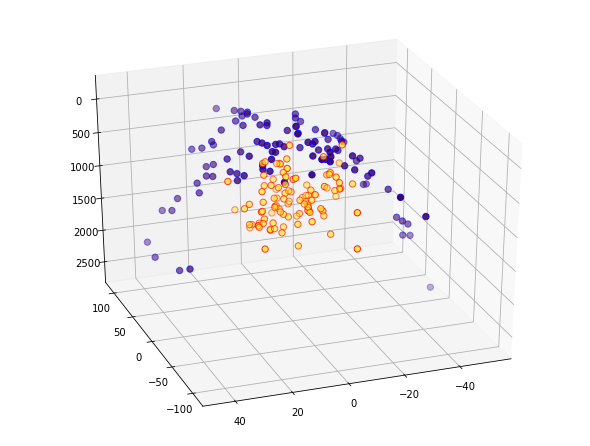

In [171]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

N=100

df1 = 20*pd.DataFrame(np.random.randn(N, 3), columns=['A', 'B','C'])
df1['B']=df1['A']+40*np.random.normal(0,1,N)
df1['C']=df1['A'] ** 2 + 100*np.random.normal(0,1,N)

df2 = [10,30,300]*pd.DataFrame(np.random.randn(N, 3), columns=['A', 'B','C'])
df2['C']=df2['C']+1000

Data=df1.append(df2, ignore_index = True)
Data['D']=1
Data.loc[range(0,N),'D']=0
import matplotlib.pyplot as plt

X = Data[['A','B','C']]
#print(X)
#print(X.loc[:,'A'])
y = Data['D']

model1 = LogisticRegression().fit(X,y)
y_pred1 = model1.predict(X)
cm1 = confusion_matrix(y, y_pred1)
print(cm1)

recall1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Czulosc: ', recall1)

spc1 = cm1[0,0]/(cm1[1,0]+cm1[1,1])
print('Swoistosc: ', spc1)

prec1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Dodatnia wartosc predykcyjna: ', prec1)

f11 = 2*recall1*prec1/(recall1+prec1)
print('F1: ', f11)

A2 = X['A']**2
X['A2'] = A2

model2 = LogisticRegression().fit(X,y)
y_pred2 = model2.predict(X)

print(y_pred2)


cm2 = confusion_matrix(y, y_pred2)
print(cm2)

recall2 = cm2[1,1]/(cm2[0,1]+cm2[1,1])
print('Czulosc: ', recall2)

spc2 = cm2[0,0]/(cm2[1,0]+cm2[1,1])
print('Swoistosc: ', spc2)

prec2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Dodatnia wartosc predykcyjna: ', prec2)

f12 = 2*recall2*prec2/(recall2+prec2)
print('F1: ', f12)

s='b'*N+'r'*N
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X.loc[:,'A'], X.loc[:,'B'], X.loc[:,'C'], c=y, edgecolor=list(s), s=40)



plt.show()
